# Materials
### [Kaggle Source Code](https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall)
### [Kaggle Ref](https://www.kaggle.com/batibayburak/great-guide-of-starters-lightgbm)
### [OneHotEncoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)
### [決定木とロジスティック回帰](https://news.mynavi.jp/article/Python_ML-6/)
### [DecisionTreeDocuments](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
### [Tableau and DecisionTree](http://lovedata.main.jp/2018/12/28/data-mining-process/)

# 1 : Importing Dependencies and Loading Data set

## [Data](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT

/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
bank = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
#forTableau
bank.to_csv('./data/data_for_tableau.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2 : Exploratory Analysis

## 2.1. Knowing the categorical variables

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [5]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [6]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [7]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [8]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


## 2.2 Age

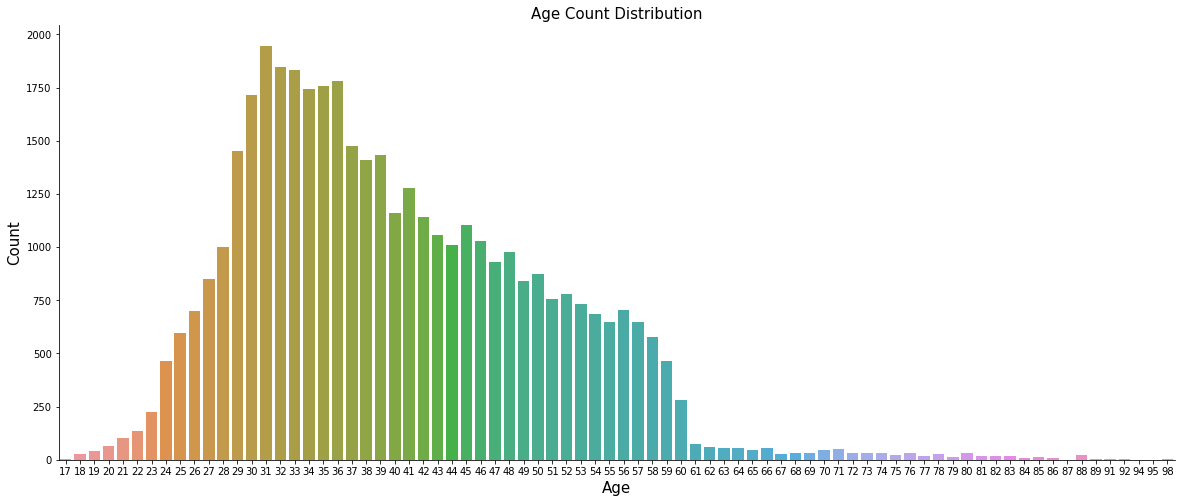

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
plt.savefig('./imgs/AgeCountDistribution.png')
sns.despine()

In [10]:
print('MEAN:', round(bank_client['age'].mean(), 1))
print('STD :', round(bank_client['age'].std(), 1))

MEAN: 40.0
STD : 10.4


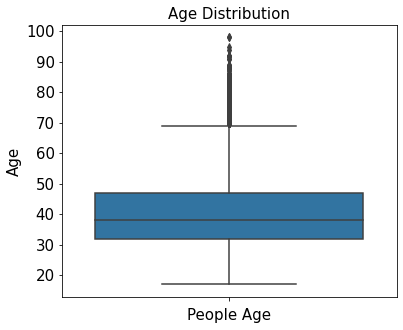

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v')
ax.set_xlabel('People Age', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('AgeBoxPlot.png')

In [12]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [13]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


## 2.3 Jobs

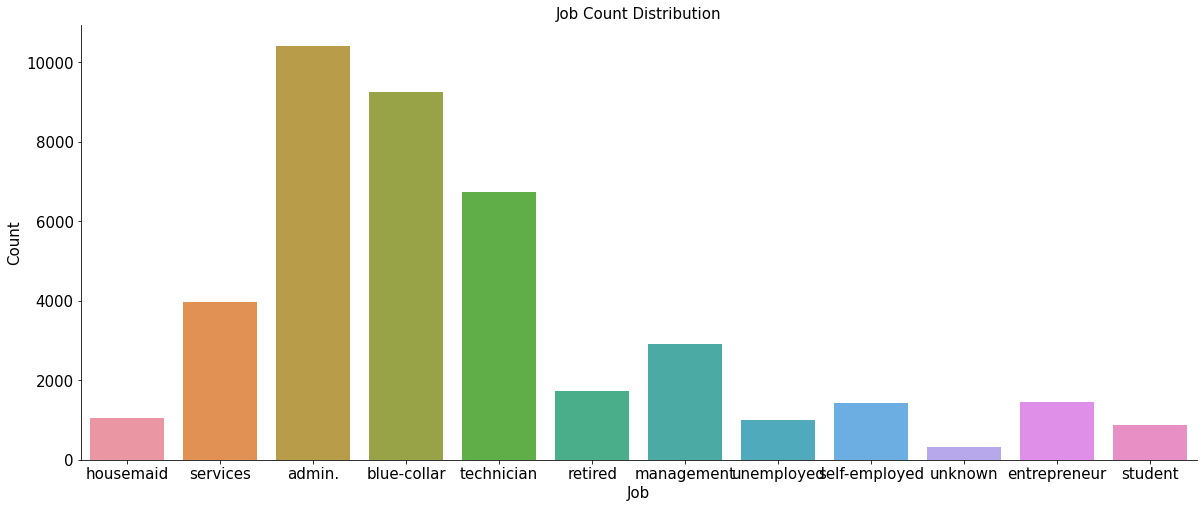

In [14]:
# What kind of jobs clients this bank_client have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('./imgs/JobCountDistribution.png')
sns.despine()

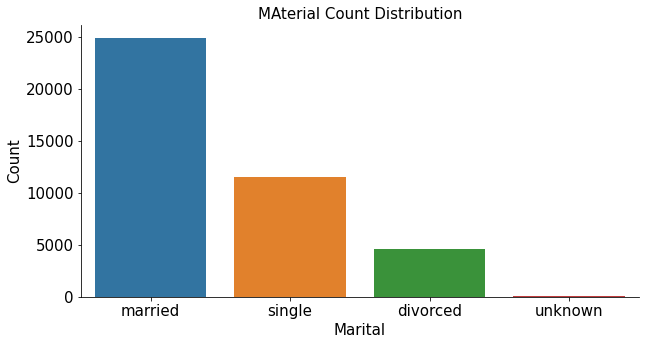

In [15]:
# What kind of 'marital clients' this bank_client have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('MAterial Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('./imgs/MaterialCountDistribution.png')
sns.despine()

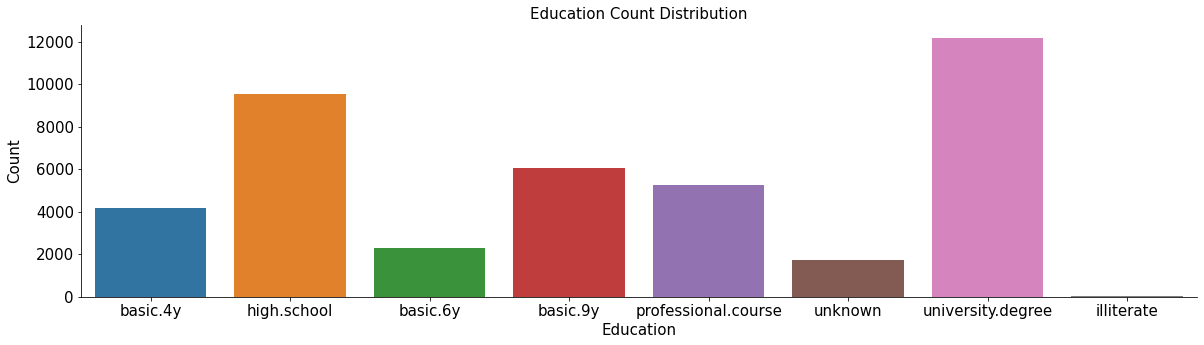

In [16]:
# What kind of 'education clients this bank_client have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('./imgs/EducationCountDistribution.png')
sns.despine()

## 2.4 Default, Housing, Loan

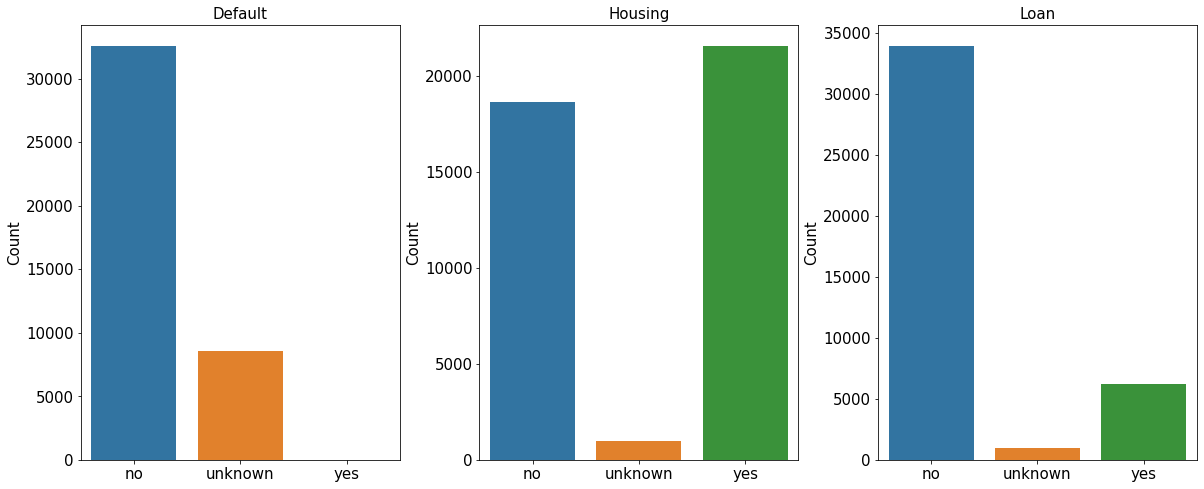

In [17]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

## 2.5 Last Contact of the Current Campaign

In [18]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [19]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


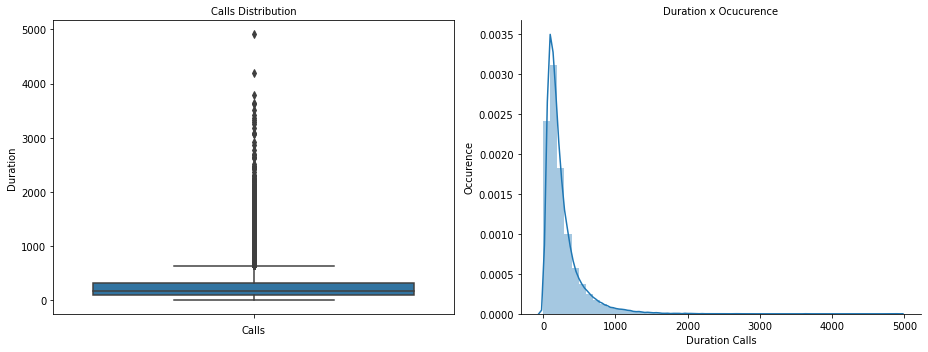

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [21]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [22]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [23]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


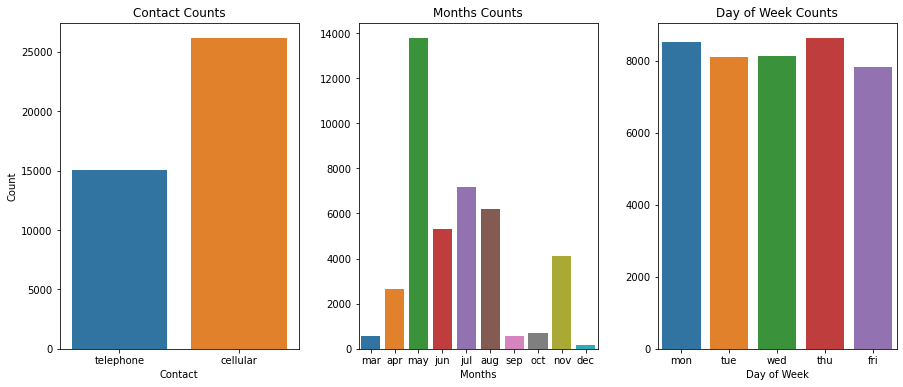

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [25]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [26]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


# 3. Data Cleaning

In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome']

for i in categorical_column:
    le = LabelEncoder()
    bank[i] = le.fit_transform(bank[i])
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


## Set Data & Separate Train and Test Data

In [28]:
X = bank.loc[:,:'nr.employed']
y = bank['y']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1942313295, random_state = 101)

# 4. Training the Model

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)#criterion = entopy,gini
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 5.  Model Evaluation

## Decision Tree Model

In [31]:
clfpred = clf.predict(X_test)
print(confusion_matrix(y_test, clfpred ))
print(round(accuracy_score(y_test, clfpred),2)*100)
RFCCV = (cross_val_score(clf, X_train, y_train, n_jobs=1, scoring = 'accuracy').mean())
#train scoreを出す

[[6682  391]
 [ 385  542]]
90.0


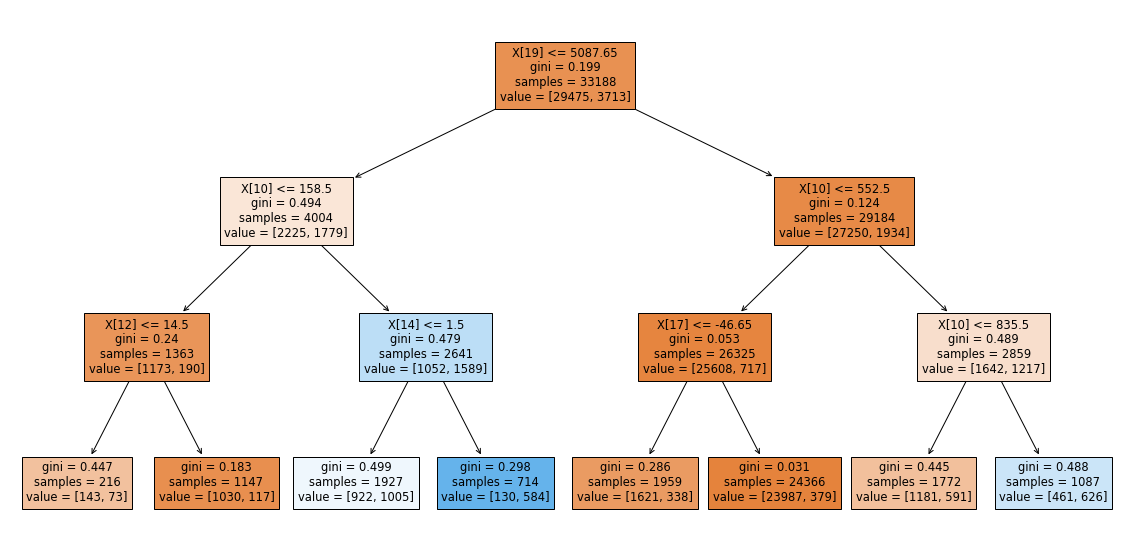

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plot_tree(clf, filled=True)
plt.show()

In [33]:
clfpred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [34]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3669,32,7,1,3,0,0,2,1,6,0,270,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0
20131,57,9,2,3,0,2,0,0,1,1,72,2,999,0,1,1.4,93.444,-36.1,4.965,5228.1
2492,33,4,2,6,0,2,2,1,6,3,160,3,999,0,1,1.1,93.994,-36.4,4.856,5191.0
14088,29,1,1,2,0,2,0,0,3,1,104,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
34986,27,1,1,2,0,0,2,0,6,0,12,5,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24463,42,0,1,6,0,0,0,0,7,1,62,1,999,1,0,-0.1,93.200,-42.0,4.191,5195.8
10055,56,2,1,7,1,0,2,1,4,2,192,1,999,0,1,1.4,94.465,-41.8,4.958,5228.1
8222,34,1,1,0,0,0,0,1,4,3,404,13,999,0,1,1.4,94.465,-41.8,4.864,5228.1
1488,37,9,2,6,0,2,0,1,6,2,248,3,999,0,1,1.1,93.994,-36.4,4.855,5191.0


In [35]:
predicted = pd.DataFrame({'TreePredicted':clfpred})
data_predicted = pd.concat([bank, predicted], axis =1)

In [36]:
data_predicted.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,TreePredicted
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no


## Liner Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, n_jobs=1, scoring = 'accuracy').mean())

/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[6894  179]
 [ 588  339]]
90.0


/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

## Groupwork2
* アウトプットの解釈、変数の寄与度の解釈
* パラメータを変更して過学習を解釈
* 施策の検討

In [38]:
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBClassifier

plot_decision_regions(data_predicted[:,['job', 'age']], predicted, clf = clf,res=0.02, legend=2)

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


## def plot_decision_regions(X,y,classifier, resolution=0.02):
      #マーカーとカラーマップの準備
      markers=(“s”,“x”,“o”,“^”,“v”)
      colors=(“red”,“blue”,“lightgreen”,“gray”,“cyan”)
      cmap=ListedColormap(colors[:len(np.unique(y))])
      #決定領域のプロット
      x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
      x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
      #グリッドポイントの生成
      xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
      #
      Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
      Z=Z.reshape(xx1.shape)
      plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
      plt.xlim(xx1.min(),xx1.max())
      plt.ylim(xx2.min(),xx2.max())
      #クラスごとにサンプルをプロット
      for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],y=X[y==cl, 1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
        
        from mlxtend.plotting import plot_decision_regions
    from xgboost import XGBClassifier

    plot_decision_regions(X, y, clf=clf,res=0.02, legend=2)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.scatter(data_predicted['age'], data_predicted['job'], c=clfpred)
    plt.xlabel('Medical care')
    plt.ylabel('Culture & recreation')